In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data processing

In [2]:
data_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))+'./data/project_size.csv'
data_repo_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))+'./data/Dataset.csv'
data_repo = pd.read_csv(data_repo_path)
repo_size = pd.read_csv(data_path)
data_repo

,Repos,config,created_at,Responsable AI principles,stars,Number of Commits,contrib,language,description
0,NBNARADHYA/bosch-inter-iit,captum,2021-03-10T17:05:43Z,Transparency & Explainability,1,51,5,Jupyter Notebook,Vehicle automation use-case to help vehicles b...
1,dapivei/data-product-architecture-final-project,aequitas,2020-01-22T07:07:37Z,Fairness,1,396,6,Jupyter Notebook,Contiene la presentación del proyecto de datos...
2,abnormal-distribution/AC295_abnormal-distribution,captum,2020-09-28T10:06:54Z,Transparency & Explainability,1,161,5,Jupyter Notebook,NaN
3,ArquitecturaProductoDatos7/Diseno_producto_de_...,aequitas,2020-02-12T02:27:28Z,Fairness,1,477,4,Jupyter Notebook,Diseño del producto de datos
4,hanbo-e/wimlds_emissions,explainerdashboard,2021-04-13T11:08:16Z,Transparency & Explainability,1,159,3,Jupyter Notebook,A team project mentored by WiMLDS predicting w...
...,...,...,...,...,...,...,...,...,...
97,parkbeomsik/opacus-fusion,Opacus,2021-03-14T19:39:22Z,Privacy,1,710,2,Python,NaN
98,msai-amin/DP-FL,Opacus,2022-05-04T18:19:54Z,Privacy,1,244,1,Jupyter Notebook,Set of experiments related to segmentation mod...
99,dkober123/sample_apps,aix360,2022-02-15T21:52:35Z,Transparency & Explainability,10,2602,30,Jsonnet,NaN
100,MisaNguyen/DPSGD,Opacus,2020-12-10T11:10:08Z,Privacy,2,103,1,Python,Several GAN implementations


In [3]:
data_repo = data_repo[["Repos", "stars", "Number of Commits", "contrib"]]
data_repo

,Repos,stars,Number of Commits,contrib
0,NBNARADHYA/bosch-inter-iit,1,51,5
1,dapivei/data-product-architecture-final-project,1,396,6
2,abnormal-distribution/AC295_abnormal-distribution,1,161,5
3,ArquitecturaProductoDatos7/Diseno_producto_de_...,1,477,4
4,hanbo-e/wimlds_emissions,1,159,3
...,...,...,...,...
97,parkbeomsik/opacus-fusion,1,710,2
98,msai-amin/DP-FL,1,244,1
99,dkober123/sample_apps,10,2602,30
100,MisaNguyen/DPSGD,2,103,1


In [4]:
repo_size

,project,lines_of_code
0,C:\Users\fpatr\PycharmProjects\Fairness-librar...,42889
1,C:\Users\fpatr\PycharmProjects\Fairness-librar...,9280
2,C:\Users\fpatr\PycharmProjects\Fairness-librar...,41783
3,C:\Users\fpatr\PycharmProjects\Fairness-librar...,806082
4,C:\Users\fpatr\PycharmProjects\Fairness-librar...,760661
...,...,...
93,C:\Users\fpatr\PycharmProjects\Fairness-librar...,64940
94,C:\Users\fpatr\PycharmProjects\Fairness-librar...,1137
95,C:\Users\fpatr\PycharmProjects\Fairness-librar...,4333
96,C:\Users\fpatr\PycharmProjects\Fairness-librar...,11748


In [5]:
def clean_dataframe(df):
    # Remove expression from file column
    df['project'] = df['project'].str.replace(r'C:\\Users\\fpatr\\PycharmProjects\\Fairness-library-paper./data/clones\\', '')

    return df

In [6]:
project_slc = clean_dataframe(repo_size)
project_slc

C:\Users\fpatr\AppData\Local\Temp\ipykernel_30328\343019735.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['project'] = df['project'].str.replace(r'C:\\Users\\fpatr\\PycharmProjects\\Fairness-library-paper./data/clones\\', '')


,project,lines_of_code
0,abnormal-distribution,42889
1,arguz95,9280
2,rodolphoya,41783
3,data-science-on-aws-workshop-2021-06-28,806082
4,leoalexand/aws-ds-NLP-BERT,760661
...,...,...
93,parkbeomsik,64940
94,simontkl,1137
95,sisaman,4333
96,woodyx218,11748


In [7]:
def add_config_responsable(df1, df2):
    """
    This function finds elements in the 'library' column of the second DataFrame that contain substrings of elements in the
    'config' column of the first DataFrame, and adds two new columns ('config' and 'Responsable_AI_principles') to the second
    DataFrame containing the corresponding 'config' and 'Responsable_AI_principles' values from the first DataFrame.

    Args:
        df1 (pandas.DataFrame): The first DataFrame to use for matching.
        df2 (pandas.DataFrame): The second DataFrame to update.

    Returns:
        The updated second DataFrame with new 'config' and 'Responsable_AI_principles' columns.
    """

    # Initialize new 'config' and 'Responsable_AI_principles' columns in the second DataFrame
    df2['lines_of_code'] = ''
    #df2.loc[:, ('lines_of_code')] = ''

    # Loop over each row in the second DataFrame
    for i, row in df2.iterrows():
        # Loop over each row in the first DataFrame
        for j, row2 in df1.iterrows():
            # Check if the 'config' value in the first DataFrame is a substring of the 'library' value in the second DataFrame
            if row2['project'] in row['Repos']:
                # If there is a match, set the corresponding 'config' and 'Responsable_AI_principles' values in the second DataFrame
                df2.at[i, 'lines_of_code'] = row2['lines_of_code']
                # Break out of the inner loop, since we've found a match
                break

    return df2

In [8]:
final_data = add_config_responsable(project_slc, data_repo)
#final_data.to_csv("project_metric.csv", index= False)

C:\Users\fpatr\AppData\Local\Temp\ipykernel_30328\4242077370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lines_of_code'] = ''


# Data visualization

In [9]:
project_metric_data = pd.read_csv("project_metric.csv")
project_metric_data

,Repos,Stars,commits,Contributors,Size
0,NBNARADHYA/bosch-inter-iit,1,51,5,7632
1,dapivei/data-product-architecture-final-project,1,396,6,9952
2,abnormal-distribution/AC295_abnormal-distribution,1,161,5,42889
3,ArquitecturaProductoDatos7/Diseno_producto_de_...,1,477,4,5386
4,hanbo-e/wimlds_emissions,1,159,3,2608
...,...,...,...,...,...
97,parkbeomsik/opacus-fusion,1,710,2,64940
98,msai-amin/DP-FL,1,244,1,10436
99,dkober123/sample_apps,10,2602,30,217919
100,MisaNguyen/DPSGD,2,103,1,257021


In [10]:
# def plot_violin_boxplot(df, filename):
#     colors = sns.color_palette("husl", len(df.columns))
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
#     handles = []
#     labels = []
#     for i, col in enumerate(df.columns):
#         ax = axes[i//2, i%2]
#         q1, q3 = np.percentile(df[col], [25, 75])
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#         max_val = df_filtered[col].max()
#         ax.set_ylim(0, max_val)
#         sns.set(font_scale = 1)
# #         sns.set_style(style='white')
#         violin = sns.violinplot(data=df_filtered[col], ax=ax, color=colors[i], alpha=0.8)
#         box = sns.boxplot(data=df_filtered[col], ax=ax, color=colors[i], width=.15, boxprops=dict(facecolor=colors[i], alpha=0.8), medianprops=dict(color='white'))
#         handles.append(violin.collections[0])
#         labels.append(col)
#         ax.set_xlabel(col)
#         ax.set_xticklabels(ax.get_xticks().astype(int))
#     fig.legend(handles, labels, loc= 'lower left', bbox_to_anchor=(0.1, 1.05), title='Metrics')
#     fig.supxlabel("Project's Metrics", fontsize=10)
#     plt.tight_layout()
#     plt.savefig(filename, format='pdf', bbox_inches='tight')
#     plt.show()


In [11]:
def plot_violin_boxplot(df, filename):
    colors = sns.color_palette("husl", len(df.columns))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    handles = []
    labels = []
    for i, col in enumerate(df.columns):
        ax = axes[i//2, i%2]
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        max_val = df_filtered[col].max()
        ax.set_ylim(0, max_val)
        sns.set(font_scale=1)
        violin = sns.violinplot(data=df_filtered[col], ax=ax, color=colors[i], alpha=0.8, grid=True)
        box = sns.boxplot(data=df_filtered[col], ax=ax, color=colors[i], width=.15, boxprops=dict(facecolor=colors[i], alpha=0.8), medianprops=dict(color='white'))
        handles.append(violin.collections[0])
        labels.append(col)
        ax.set_xlabel(col)
        ax.set_xticklabels(ax.get_xticks().astype(int))
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(0.1, 1.05), title='Metrics')
    fig.supxlabel("Project's Metrics", fontsize=10)
    plt.tight_layout()
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.show()


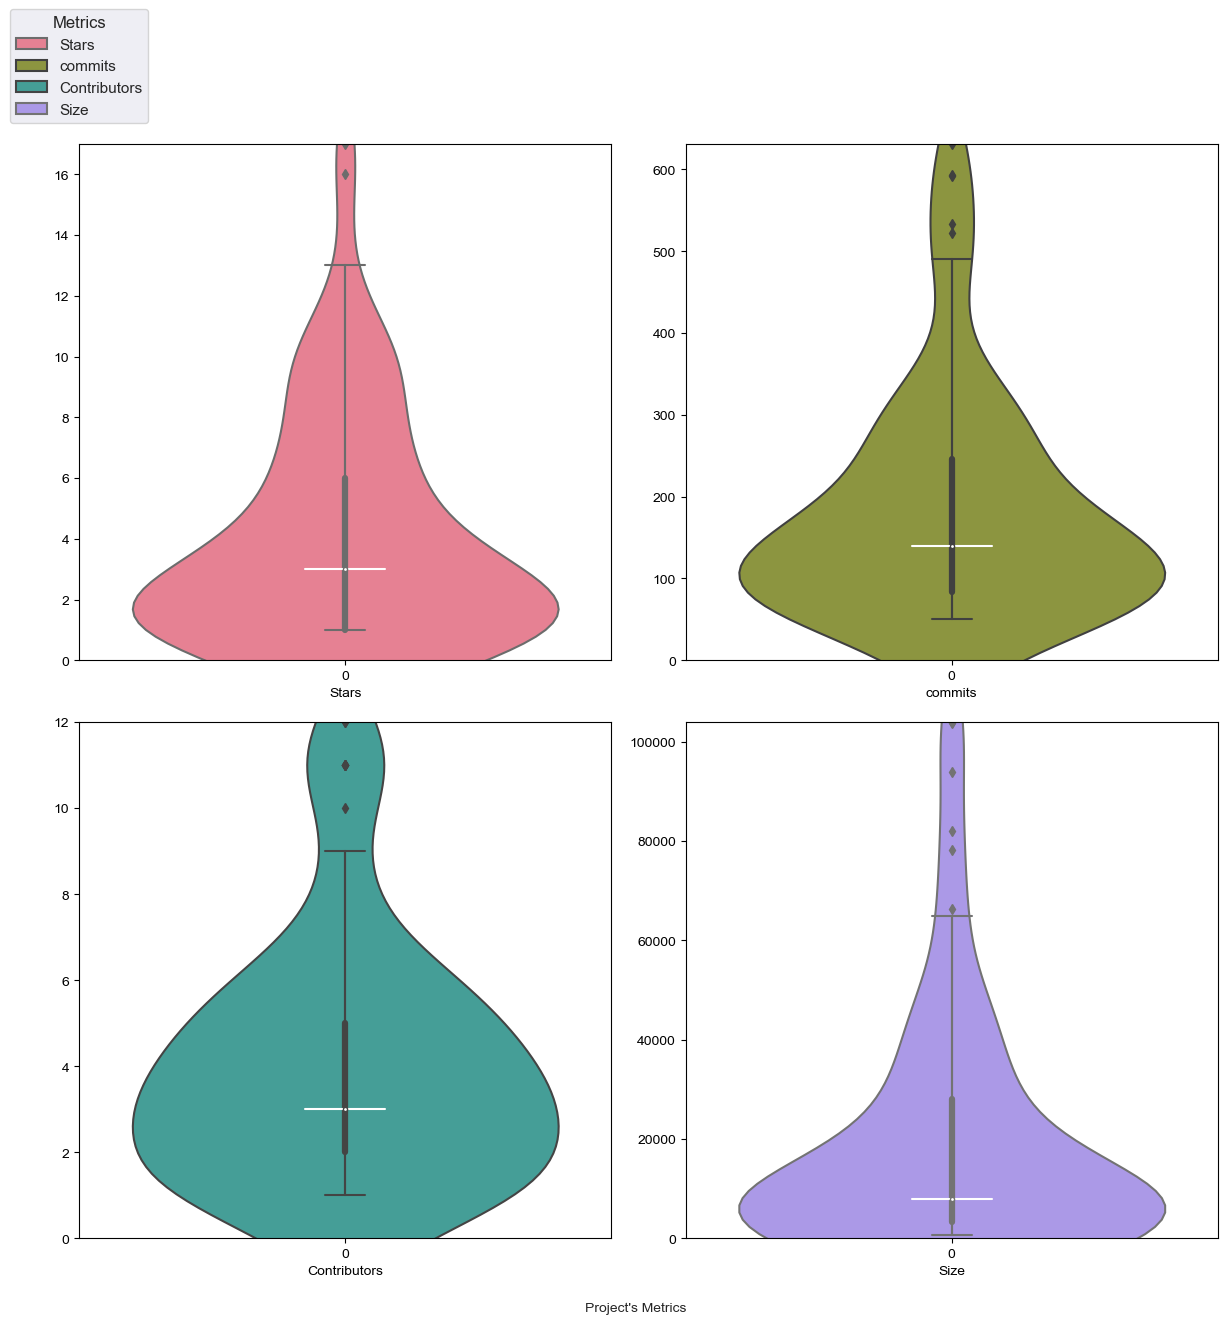

In [12]:
plot_violin_boxplot(project_metric_data[["Stars", "commits", "Contributors", "Size"]], 'Metric_plot.pdf')

In [53]:
def plot_violin_boxplot(df, filename):
    sns.set(font_scale=1.5)  # Increase the base font size
    colors = sns.color_palette("husl", len(df.columns))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    handles = []
    labels = []
    for i, col in enumerate(df.columns):
        ax = axes[i//2, i%2]
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        max_val = df_filtered[col].max()
        ax.set_ylim(0, max_val)
        violin = sns.violinplot(data=df_filtered[col], ax=ax, color=colors[i], alpha=0.8, grid=True)
        box = sns.boxplot(data=df_filtered[col], ax=ax, color=colors[i], width=.15, 
                          boxprops=dict(facecolor=colors[i], alpha=0.8), 
                          medianprops=dict(color='white'))
        handles.append(violin.collections[0])
        labels.append(col)
        ax.set_xlabel(col, fontsize=14)  # Set font size for x-axis label
        ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=12)  # Set font size for x-axis tick labels
        ax.tick_params(axis='y', labelsize=12)  # Set font size for y-axis tick labels
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1, 1.05), title='Metrics', fontsize=12, title_fontsize=14)
    fig.supxlabel("Project's Metrics", fontsize=14)  # Set font size for the supxlabel
    plt.tight_layout()  # Adjust the right parameter to make space for the legend
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.show()

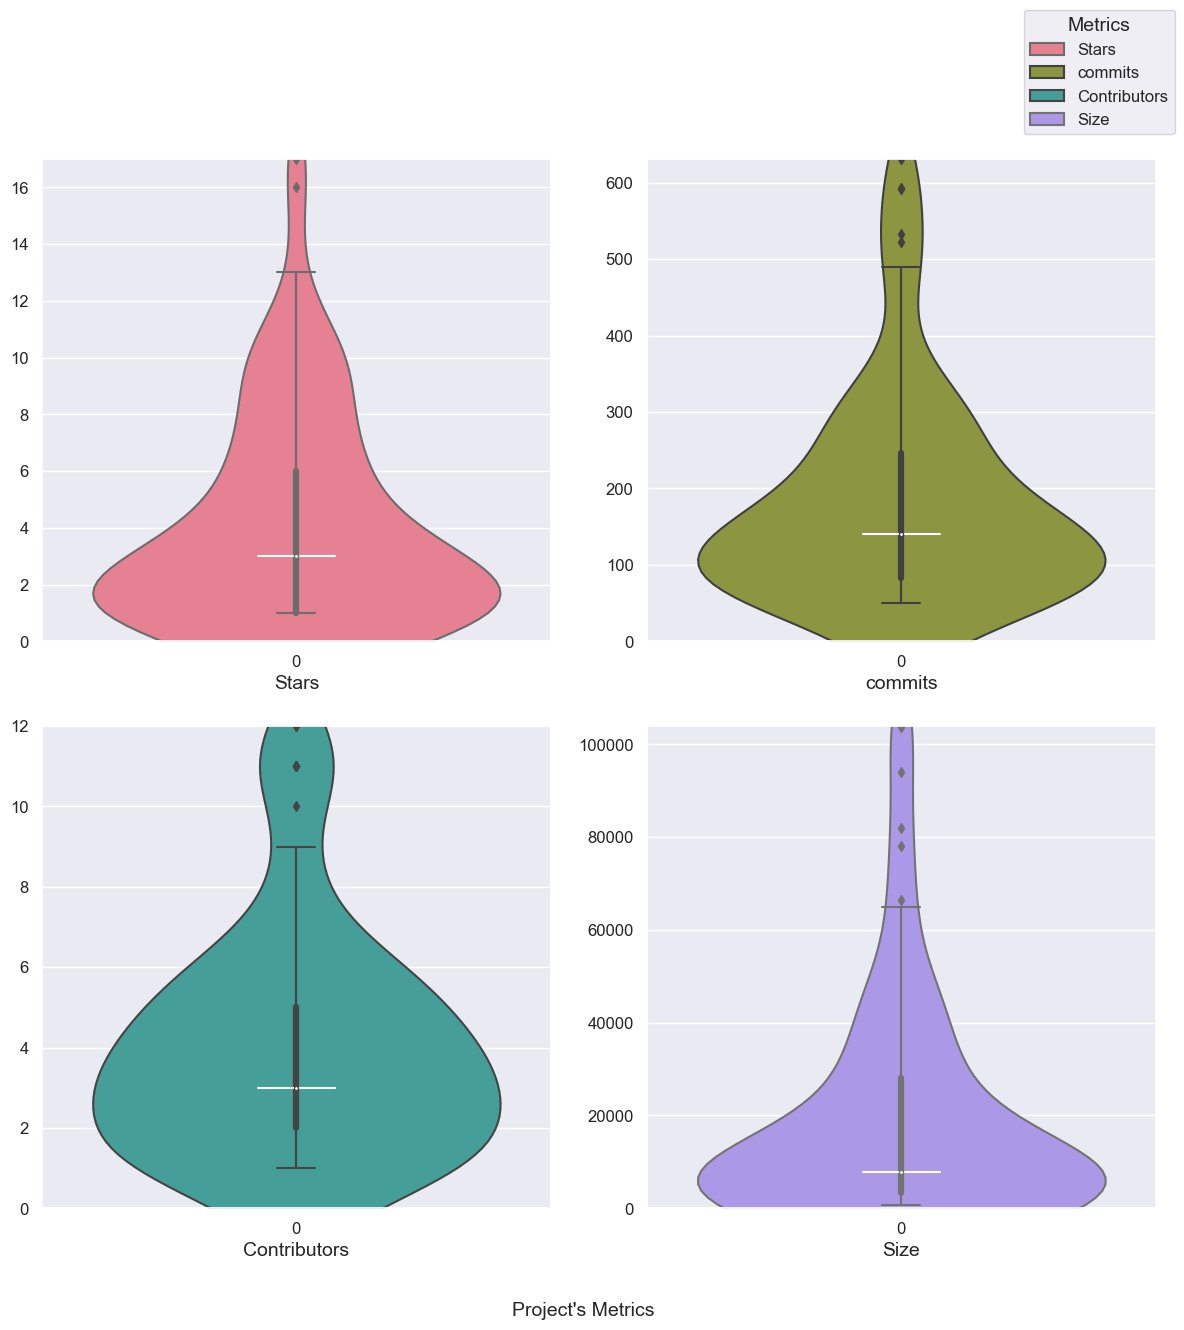

In [54]:
plot_violin_boxplot(project_metric_data[["Stars", "commits", "Contributors", "Size"]], 'Metric_plot.pdf')